# **Data Science**

https://www.youtube.com/watch?v=FTpmwX94_Yo&t=94s&ab_channel=freeCodeCamp.org

In [2]:
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install scipy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm
import seaborn as sns

---

## **Load data**

In [4]:
data_csv = pd.read_csv("data/percent-bachelors-degrees-women-usa.csv", sep=",")
data_csv.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.22979798,11.92100539,59.7,29.08836297,9.064438975,35.3,13.6,74.53532758,0.8,65.57092343,73.8,77.1,38,13.8,44.4,68.4,36.8
1,1970,4.22979798,11.92100539,59.7,29.08836297,9.064438975,35.3,13.6,74.53532758,0.8,65.57092343,73.8,77.1,38,13.8,44.4,68.4,36.8
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na
4,1971,5.452796685,12.00310559,59.9,29.39440285,9.503186594,35.5,13.6,74.14920369,1,64.55648516,73.9,75.5,39,14.9,46.2,65.5,36.2


In [5]:
new_data = data_csv.drop_duplicates(subset=["Agriculture"])
new_data.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.22979798,11.92100539,59.7,29.08836297,9.064438975,35.3,13.6,74.53532758,0.8,65.57092343,73.8,77.1,38,13.8,44.4,68.4,36.8
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na
4,1971,5.452796685,12.00310559,59.9,29.39440285,9.503186594,35.5,13.6,74.14920369,1,64.55648516,73.9,75.5,39,14.9,46.2,65.5,36.2
5,1972,7.42071022,13.21459351,60.4,29.81022105,10.5589621,36.6,14.9,73.55451996,1.2,63.6642632,74.6,76.9,40.2,14.8,47.6,62.6,36.1


In [6]:
data_txt = pd.read_csv("data/StudentSchools.txt", header=0, sep=",")
data_txt.head()

,Name,SchoolId,Country
0,Tina,123,Canada
1,Anna,123,Canada
2,Zain,204,Canada
3,Jim,456,USA
4,Tom,89,China


In [7]:
data_csv.describe()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
count,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
unique,44,44,44,31,44,44,38,39,44,38,44,35,35,34,40,38,39,37
top,1970,4.22979798,11.92100539,61.3,29.08836297,9.064438975,60,13.6,74.53532758,16.8,65.57092343,71.2,83.5,47,40.7,77.5,68.4,36.8
freq,2,2,2,3,2,2,3,3,2,3,2,3,4,4,3,3,2,2


In [8]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Year                           45 non-null     object
 1   Agriculture                    45 non-null     object
 2   Architecture                   45 non-null     object
 3   Art and Performance            45 non-null     object
 4   Biology                        45 non-null     object
 5   Business                       45 non-null     object
 6   Communications and Journalism  45 non-null     object
 7   Computer Science               45 non-null     object
 8   Education                      45 non-null     object
 9   Engineering                    45 non-null     object
 10  English                        45 non-null     object
 11  Foreign Languages              45 non-null     object
 12  Health Professions             45 non-null     object
 13  Math an

In [9]:
data_csv.isnull().sum()

Year                             0
Agriculture                      0
Architecture                     0
Art and Performance              0
Biology                          0
Business                         0
Communications and Journalism    0
Computer Science                 0
Education                        0
Engineering                      0
English                          0
Foreign Languages                0
Health Professions               0
Math and Statistics              0
Physical Sciences                0
Psychology                       0
Public Administration            0
Social Sciences and History      0
dtype: int64

In [10]:
data = pd.DataFrame({
    'Name': ["Anna", "Karen", "John", "Alice", "Kevin", "Sanne", "Bob", "Emily"],
    'Age': [35, 30, 57, 65, 25, 19, 20, 65],
    'Salary': [20000, 60000, 145000, 170000, 30000, 10000, 220000, 120000],
    'Department': ["Tech", "Tech", "Tech", "Healthcare", "Operations", "Operations", "Tech", "Tech"]
})

In [11]:
data.groupby("Department").agg({"Salary": ["sum", "mean", "std"], "Age": ["std","mean"]})

Salary                                Age      
               sum      mean           std        std  mean
Department                                                 
Healthcare  170000  170000.0           NaN        NaN  65.0
Operations   40000   20000.0  14142.135624   4.242641  22.0
Tech        565000  113000.0  77427.385336  18.902381  41.4

In [12]:
data[data.Age.isin([35,30])]

,Name,Age,Salary,Department
0,Anna,35,20000,Tech
1,Karen,30,60000,Tech


In [13]:
data[(data.Salary > 60000) & (data.Age > 57)]

,Name,Age,Salary,Department
3,Alice,65,170000,Healthcare
7,Emily,65,120000,Tech


In [14]:
stats.mode(data.Age)

ModeResult(mode=np.int64(65), count=np.int64(2))

---

## **Merge**

In [15]:
data_1 = pd.DataFrame({
    "key": ["A", "B", "C", "D", "E"],
    "value": [1, 2, 3, 4, 5]
})

data_2 = pd.DataFrame({
    "key": ["D", "E", "F", "G", "H"],
    "value": [4, 5,6,7,8]
})

In [16]:
data_2

,key,value
0,D,4
1,E,5
2,F,6
3,G,7
4,H,8


In [17]:
merge_data = pd.merge(data_1, data_2, on="key", how="left", indicator=True)
left_anti_joimn = merge_data[merge_data._merge == "left_only"].drop("_merge", axis=1)

In [18]:
left_anti_joimn

,key,value_x,value_y
0,A,1,NaN
1,B,2,NaN
2,C,3,NaN


---

## **Normal distribution**

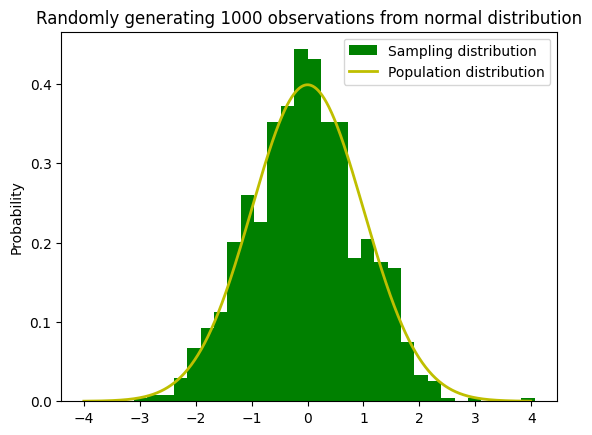

In [19]:
X_normal = np.random.normal(0,1,1000)
count, bins, ignore = plt.hist(X_normal, 30, density=True, color="green", label="Sampling distribution")

x_value = np.arange(-4,4,0.01)
y_value = norm.pdf(x_value)
plt.plot(x_value, y_value, color="y", linewidth=2, label="Population distribution")

plt.ylabel("Probability")
plt.title("Randomly generating 1000 observations from normal distribution")
plt.legend()
plt.show()

---

## **Hypothesis testing**

**Null Hypothesis (H₀)**: The CTR for the control and experimental groups are the same.  
## $$ H_0: p_{con}= p_{exp}$$

**Alternative Hypothesis (H₁)**: The CTR for the control and experimental groups are different.  
## $$ H_1: p_{con} \neq p_{exp} $$

**Step 1**: Hypothesis of A/B test.  
**Step 2**: A/B test design | power analysis.  
**Step 3**:  
**Step 4**:  
**Step 5**:  

**Determine power of the test**  
- It is the probability of correctly rejecting H0 when H0 is false.  
- In other words it is the probability of not making a Type 2 error (not rejecting H0 when it is false).  
- Type 2 error = beta, therefore power of test equal to (1 - beta).  
- Common to pick 80% (meaning we will commit a Type 2 error 20% of the time).  

**Determine significance level**  
- Probability of rejecting H0 when H0 is true i.e. finding an effect when there is none.  
- Probability of making a false discovery (false positive).  
- Type 1 error = alpha.  
- Common to pick 5% (i.e. 5% of outputs will be false positives).  
- Lowering the significance level makes the test more stringent and therefore harder to reject H0.  

**Determine minimum detectable effect**  
- What is the smallest effect that would matter in practice.  
- Over and above the significance level what is the difference between scenarios that must be achieved for us reject H0.  
- Practical significance.  
- Measured by delta.  

**Business hypothesis**: describes what two things are being compared.  

**Statistical hypothesis**: Used to determine if there is significant difference between observed and expected data.  
**H0**: Subject to rejection.  
**H1**: Subject to acceptance.  

**Primary metric**: How to measure success for experimental & control group (e.g. clicks). Used to identify if there is statistical significance.  

---

## **A/B testing**

In [20]:
# Simulated user-aggregated data from an experiment with webpage views and button clicks attributes.
data_ab = pd.read_csv("data/ab_test_data.csv")
data_ab.head()

,user_id,group,views,clicks
0,1,control,10.0,0.0
1,2,control,1.0,0.0
2,3,control,1.0,0.0
3,4,control,2.0,0.0
4,5,control,3.0,0.0


In [21]:
data_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  120000 non-null  int64  
 1   group    120000 non-null  object 
 2   views    120000 non-null  float64
 3   clicks   120000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [22]:
data_ab.drop("views", axis=1, inplace=True)

In [23]:
data_ab.groupby(["group", "clicks"]).size().reset_index(name='count')

,group,clicks,count
0,control,0.0,51180
1,control,1.0,7640
2,control,2.0,960
3,control,3.0,165
4,control,4.0,38
5,control,5.0,9
6,control,6.0,5
7,control,7.0,3
8,test,0.0,50297
9,test,1.0,8206


In [24]:
# where clicks > 1 drop row as these appear to be anomalies

data_ab.drop(data_ab[data_ab.clicks > 1].index, inplace=True)

In [25]:
data_ab.describe()

,user_id,clicks
count,117323.000000,117323.000000
mean,59920.177178,0.135063
std,34640.021476,0.341792
min,1.000000,0.000000
25%,29928.500000,0.000000
50%,59838.000000,0.000000
75%,89925.500000,0.000000
max,120000.000000,1.000000


In [26]:
data_ab.groupby(["group", "clicks"]).size().reset_index(name='count')

,group,clicks,count
0,control,0.0,51180
1,control,1.0,7640
2,test,0.0,50297
3,test,1.0,8206


In [27]:
data_ab.groupby("group").agg({"clicks": ["sum", "mean"]})

clicks          
            sum      mean
group                    
control  7640.0  0.129888
test     8206.0  0.140266

In [28]:
total_clicks = data_ab.clicks.sum()
total_count = data_ab.user_id.count()
total_clicks_percent = total_clicks / total_count

control_clicks = data_ab[data_ab.group == "control"].clicks.sum()
control_impressions = data_ab[data_ab.group == "control"].user_id.count()
p_con_hat = control_clicks / control_impressions

test_clicks = data_ab[data_ab.group == "test"].clicks.sum()
test_impressions = data_ab[data_ab.group == "test"].user_id.count()
p_exp_hat = test_clicks / test_impressions

In [29]:
print(f"Click probability in control group: {p_con_hat:.2f}\nClick probability in test/experimental group: {p_exp_hat:.2f}")

Click probability in control group: 0.13
Click probability in test/experimental group: 0.14


In [30]:
# Calculating estimate of pooled click probability
p_pooled_hat = (control_clicks + test_clicks) / (control_impressions + test_impressions)
p_pooled_hat

np.float64(0.13506303111921789)

In [31]:
# pooled variance
pooled_variance = p_pooled_hat * (1-p_pooled_hat) * (1/control_impressions + 1/test_impressions)
pooled_variance

np.float64(3.982914231696163e-06)

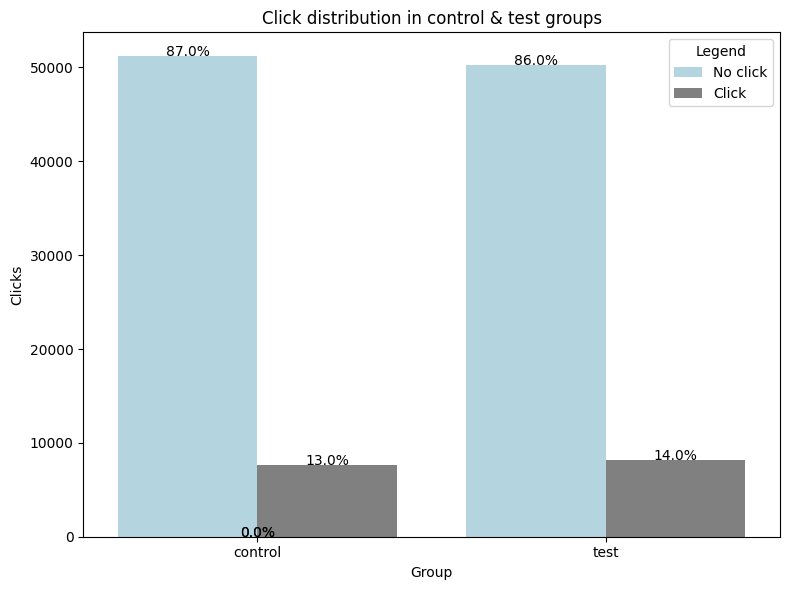

In [32]:
fig = plt.figure(figsize=(8,6))

palette = {0:"lightblue", 1:"grey"}

# Create the countplot
ax = sns.countplot(x="group", hue="clicks", data=data_ab, palette=palette)

# Get the counts for each group
group_counts = data_ab.groupby('group').size()

# Add annotations for each bar
for p in ax.patches:
    height = p.get_height()
    group = 'control' if p.get_x() < 0.5 else 'test'
    total = group_counts.loc[group]
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f"{percentage:.1f}%", ha="center", color="black")

plt.title("Click distribution in control & test groups")
plt.xlabel("Group")
plt.ylabel("Clicks")
plt.legend(title="Legend", labels=["No click", "Click"])
plt.tight_layout()
plt.show()

In [33]:
group_counts = data_ab.groupby(['group']).size()
group_counts

group
control    58820
test       58503
dtype: int64

---

### **Parameters of the model from power analysis**

**&beta;**: Probability of type II error.  
**(1-&beta;)**: Power of the test used to calculate sample size.  
**&alpha;**: Probability of Type I error, significance level.  
**&delta;**: Minimum detectable effect.  

In [34]:
alpha = 0.05
print(f"Alpha significance level is: {alpha}")

delta = 0.1 # minimum detectable effect to make business decision
print(f"Delta minimum detectable effect is: {delta}")

Alpha significance level is: 0.05
Delta minimum detectable effect is: 0.1


## **Calculating standard error & test statistics**

In [35]:
# standard error
se = np.sqrt(pooled_variance)
print(f"Standard error is: {se}")

# computing test statistics of Z-test
test_statistic = (p_con_hat - p_exp_hat) / se
print(f"Test statistic for 2-sample Z-test is: {test_statistic}")

# critical value of the two-tailed Z-test
# allocated half of the alpha to each tail
Z_crit = norm.ppf(1 - alpha/2)
print(f"Z-critical value for two-tailed standard normal distribution: {Z_crit}")

test_statistic_abs = np.abs(test_statistic)

if (test_statistic_abs > Z_crit):
    print("Reject the null hypothesis")
else: print("Do not reject the null hypothesis")

Standard error is: 0.00199572398685193
Test statistic for 2-sample Z-test is: -5.200377371882413
Z-critical value for two-tailed standard normal distribution: 1.959963984540054
Reject the null hypothesis


---

## **P-values**

The p-value is the probability of the condition under the Null occurring. Stated differently, the p-value is the probability, assuming the null hypothesis is true, of observing a result at least as extreme as the test statistic. The smaller the p-value, the stronger is the evidence against the Null Hypothesis, suggesting that it can be rejected.

- Low p-value (p < 0.05 at 5% significance level) provides strong evidence against H0, so we reject H0.  
- High p-value (p > 0.05 at 5% significance level) indicates weak evidence against H0, so we fail to reject H0.  

In [36]:
# calcuate p-value
# sf is inverse of cumulative distribution function
# two-tailed test
p_value = 2 * norm.sf(abs(test_statistic))

def is_statistical_significance(p_value, alpha):
    print(f"p-value of the two-sample Z-test is: {p_value:.2f}")
    if p_value < alpha:
        print("There is statistical significance at the 5% significance level, indicating that observed differences are unlikely to have occurred due to chance alone.")
    else:
        print("There is no statistical significance, indicating the observed difference could have occurred due to chance.")

is_statistical_significance(p_value, alpha)

p-value of the two-sample Z-test is: 0.00
There is statistical significance at the 5% significance level, indicating that observed differences are unlikely to have occurred due to chance alone.


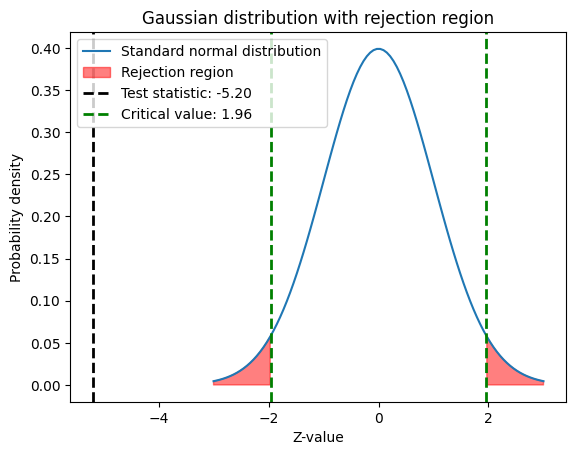

In [37]:
from scipy.stats import norm
import matplotlib.pyplot as plt
mu = 0
sigma = 1
n = 100

x = np.linspace(mu - 3*sigma, mu + 3*sigma, n)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, label="Standard normal distribution")

plt.fill_between(x,y, where=(x>Z_crit) | (x<-Z_crit), color='red', alpha=0.5, label="Rejection region")
plt.axvline(test_statistic, color='black', linestyle='dashed', linewidth=2, label=f"Test statistic: {test_statistic:.2f}")
plt.axvline(Z_crit, color='green', linestyle='dashed', linewidth=2, label=f"Critical value: {Z_crit:.2f}")
plt.axvline(-Z_crit, color='green', linestyle='dashed', linewidth=2)
plt.xlabel("Z-value")
plt.ylabel("Probability density")
plt.title("Gaussian distribution with rejection region")
plt.legend()
plt.show()

## **Calculating confidence interval**

In [38]:
CI = [
    round((p_exp_hat - p_con_hat) - se*Z_crit, 3),
    round((p_exp_hat - p_con_hat) + se*Z_crit, 3)
]

print(f"95% confidence interval of the two-sample Z-test is: [{CI[0]*100:.2f}%, {CI[1]*100:.2f}%]")
print(f"The true population parameter for the difference between the experimental and control groups lies in this range with 95% confidence.\nAt the lower end we expect a {CI[0]*100:.2f}% difference.\nAt the upper end we expect a {CI[1]*100:.2f}% difference between the groups.")

95% confidence interval of the two-sample Z-test is: [0.60%, 1.40%]
The true population parameter for the difference between the experimental and control groups lies in this range with 95% confidence.
At the lower end we expect a 0.60% difference.
At the upper end we expect a 1.40% difference between the groups.


In [39]:
def is_practically_significant(delta, CI_95):
    
    """
    Delta represents the minimum detectable effect
    CU_95 represents the lower and upper bounds of the 95% confidence interval
    """
    
    lower_bound = CI_95[0]
    if (lower_bound >= delta):
        print(f"We have practical significance!\nMDE: {delta}\nThe difference between control and experimental groups is practically significant")
    else:
        print(f"We don't have practical significance!\nMDE: {delta}\nThe difference between control and experimental groups is not practically significant")

# using the function
delta = 0.005 # we want to see at least a 0.5% increase in the conversion rate
is_practically_significant(delta, CI)

We have practical significance!
MDE: 0.005
The difference between control and experimental groups is practically significant


In [51]:
print("There exists a statistically significant difference between the control & experimental versions at the 5% significance level.")
print(f"In order to make a business decision we need a MDE of {delta*100:.1f}% between the control & experimental groups.")
print(f"The lower bound of our confidence interval suggests that the difference between the control & experimental groups will be at least {CI[0]*100:.1f}%.\nThis exceeds our MDE, therefore we can go ahead and proceed with the experimental group.")

There exists a statistically significant difference between the control & experimental versions at the 5% significance level.
In order to make a business decision we need a MDE of 0.5% between the control & experimental groups.
The lower bound of our confidence interval suggests that the difference between the control & experimental groups will be at least 0.6%.
This exceeds our MDE, therefore we can go ahead and proceed with the experimental group.
